In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.102.228.202:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.102.228.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.102.228.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [1]:
!pip3 install vaderSentiment

In [2]:
!pip3 install torch
!pip3 install transformers

In [333]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,FeatureUnion
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from nltk.cluster import KMeansClusterer,cosine_distance, euclidean_distance
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.regularizers import l2
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,CSVLogger

import torch
import transformers as ppb # pytorch transformers

In [4]:
!pip3 install spacy-transformers

In [5]:
!python3 -m spacy download en_trf_bertbaseuncased_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_trf_bertbaseuncased_lg')


In [6]:
import spacy
import pandas as pd

In [7]:
nlp=spacy.load('/usr/local/lib/python3.6/dist-packages/en_trf_bertbaseuncased_lg/en_trf_bertbaseuncased_lg-2.3.0')

Let's test it to see if it's working well.

In [8]:
apple1 = nlp("Apple shares rose on the news.")
apple2 = nlp("Apple sold fewer iPhones this quarter.")
apple3 = nlp("Apple pie is delicious.")
print(apple1[0].similarity(apple2[0]))  # 0.73428553
print(apple1[0].similarity(apple3[0]))  # 0.43365782

0.73428565
0.43365785


In [9]:
reviews_ratings=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/reviews_and_ratings.csv')

In [10]:
ratings2to4=reviews_ratings[(reviews_ratings['overall']!=1)&(reviews_ratings['overall']!=5)]
ratings2to4.head(2)

,overall,reviewText
1,4,Excellent read.
3,3,"A good, easy, light-hearted read--however ther..."


In [11]:
ratings2to4.shape

(1498644, 2)

In [12]:
#Let's just take the first 10_000 rows to test for feasibility.
reviews_ratings_selection=ratings2to4.loc[:15_000]

In [13]:
reviews_ratings_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4178 entries, 1 to 15000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     4178 non-null   int64 
 1   reviewText  4177 non-null   object
dtypes: int64(1), object(1)
memory usage: 97.9+ KB


In [16]:
del reviews_ratings
del ratings2to4
gc.collect()

20

In [68]:
#parameters for tokenization
max_len=400
training_samples=3800
validation_samples=377
max_words=1_000

In [69]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

In [70]:
#instantiate the tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [71]:
text_data=reviews_ratings_selection['reviewText'].astype('str')

In [72]:
#instantiate instance of Vader sentiment analyzer
sentiment=SentimentIntensityAnalyzer()
#using vader sentiment analyzer for a second input
df=pd.DataFrame(text_data)
#df['polarity']=sentiment.polarity_scores(df['reviewText'][:200])
df_polarity=pd.DataFrame([sentiment.polarity_scores(df.loc[:,'reviewText'][i][-200:]) for i in df.index])

In [73]:
df_polarity_input=df_polarity.iloc[:,:3]

In [74]:
#tokenized = df.loc[:,'reviewText'][i][:200].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
df_to_tokenize=pd.DataFrame([df.loc[:,'reviewText'][i][:200] for i in df.index])
df_to_tokenize

,0
0,Excellent read.
1,"A good, easy, light-hearted read--however ther..."
2,Well written period romance. I can't wait to r...
3,Great book.
4,I had the pleasure of an advanced reading copy...
...,...
4173,After reading 'The Alchemist' and my interest ...
4174,"Better late than never, I'm glad to have final..."
4175,When the attractive young woman hed chosen as ...
4176,Would be more enjoyable if you read previous b...


In [75]:
tokenized = df_to_tokenize[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))


In [76]:
#padding
#max_len = 0
#for i in tokenized.values:
#    if len(i) > max_len:
#        max_len = len(i)

#padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [77]:
#fit the tokenizer
#tokenizer.fit_on_texts(text_data)

In [78]:
#create the sequences
#sequences=tokenizer.texts_to_sequences(text_data)
#sequences=tokenizer.texts_to_sequences(tokenized)

In [79]:
#pad sequences
#padded_data=pad_sequences(tokenized,maxlen=max_len) #to be able to handle docs too small to feed.

In [80]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded_data = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [81]:
padded_data.shape

(4178, 94)

In [82]:
attention_mask = np.where(padded_data != 0, 1, 0)
attention_mask.shape

(4178, 94)

In [83]:
type(padded_data)

numpy.ndarray

In [84]:
input_ids = torch.tensor(padded_data)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask)

In [145]:
data = last_hidden_states[0][:,0,:].numpy()

In [146]:
data.shape

(4178, 768)

In [147]:
ss=StandardScaler()
data=ss.fit_transform(data)

In [148]:
#y is rating (here referred to as 'overall')
y=reviews_ratings_selection['overall']

In [149]:
#let's reset index of y and then subtract 2 as an offset so that tf.keras.utils.to_categorical works. 
#We'll have to add 2 to model output to retrieve actual label.
 
y=y.reset_index()['overall']
y=y-2

In [150]:
tf.keras.utils.to_categorical(y)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [151]:
#create train/test sets
X_train=data[:training_samples]
df_polarity_train=df_polarity_input[:training_samples]
X_test=data[training_samples:training_samples+validation_samples]
df_polarity_test=df_polarity_input[training_samples:training_samples+validation_samples]

y_train=y[:training_samples]
y_train_categorical=tf.keras.utils.to_categorical(y_train)[:,:]  #dropping first column
y_train_categorical[:4]
y_test=y[training_samples:training_samples+validation_samples]
y_test_categorical=tf.keras.utils.to_categorical(y_test)[:,:]  #dropping first column
y_test_categorical[:100]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [152]:
y_test[90:100]

3890    2
3891    2
3892    1
3893    0
3894    2
3895    1
3896    1
3897    1
3898    2
3899    1
Name: overall, dtype: int64

In [153]:
df_polarity_input

,neg,neu,pos
0,0.000,0.213,0.787
1,0.000,0.784,0.216
2,0.000,0.625,0.375
3,0.000,0.196,0.804
4,0.000,0.706,0.294
...,...,...,...
4173,0.000,0.820,0.180
4174,0.092,0.554,0.355
4175,0.069,0.711,0.220
4176,0.000,0.775,0.225


Thus, ratings 1,2,3,4,5 correspond to labels 0,1,2,3,4 respectively.

In [154]:
#simple network model
#model=Sequential()
#model.add(Dense(64,activation='relu'))
#model.add(Dense(1,activation='linear'))

In [254]:
X_train.shape

(3800, 768)

In [319]:
input_A = keras.layers.Input(shape=(768,1))
input_B = keras.layers.Input(shape=(3, ))
batch_normalization=keras.layers.BatchNormalization()(input_A)
hidden0=keras.layers.LSTM(units=64, input_shape=(768,1))(batch_normalization)
hidden1=keras.layers.Dense(1536,activation='relu',kernel_regularizer=l2(0))(hidden0)
hidden2=keras.layers.Dense(800,activation='relu',kernel_regularizer=l2(0))(hidden1)
hidden3=keras.layers.Dense(800,activation='relu',kernel_regularizer=l2(0))(hidden2)
hidden4=keras.layers.Dense(200,activation='relu',kernel_regularizer=l2(0))(hidden3)
hidden5=keras.layers.Dense(100,activation='relu',kernel_regularizer=l2(0))(hidden4)
hidden6=keras.layers.Dense(50,activation='relu',kernel_regularizer=l2(0))(hidden5)
concat=keras.layers.concatenate([hidden1,hidden2,hidden6])
hidden7=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(concat)
hidden8=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(hidden7)
concat2=keras.layers.concatenate([hidden0,hidden8,input_B])
batch_normalization2=keras.layers.BatchNormalization()(concat2)
hidden9=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(batch_normalization2)
hidden10=keras.layers.Dense(25,input_shape=(25,1),activation='relu',kernel_regularizer=l2(0))(hidden9)
concat3=keras.layers.concatenate([hidden0,hidden10])
hidden11=keras.layers.Dense(64,activation='sigmoid',kernel_regularizer=l2(0))(concat3)
hidden12=keras.layers.Dense(50,activation='relu',kernel_regularizer=l2(0))(hidden11)
hidden13=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(hidden12)
output=keras.layers.Dense(3,activation='softmax')(hidden12)

model=keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [320]:
#add a callback
callback=EarlyStopping(monitor='loss',patience=5)

In [321]:
#compile
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.001), #'Adadelta',  #keras.optimizers.Adam(lr=0.00001),
    metrics=['accuracy'],
)

In [322]:
model.summary()

Model: "functional_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_145 (InputLayer)          [(None, 768, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization_108 (BatchN (None, 768, 1)       4           input_145[0][0]                  
__________________________________________________________________________________________________
lstm_63 (LSTM)                  (None, 64)           16896       batch_normalization_108[0][0]    
__________________________________________________________________________________________________
dense_561 (Dense)               (None, 1536)         99840       lstm_63[0][0]                    
______________________________________________________________________________________

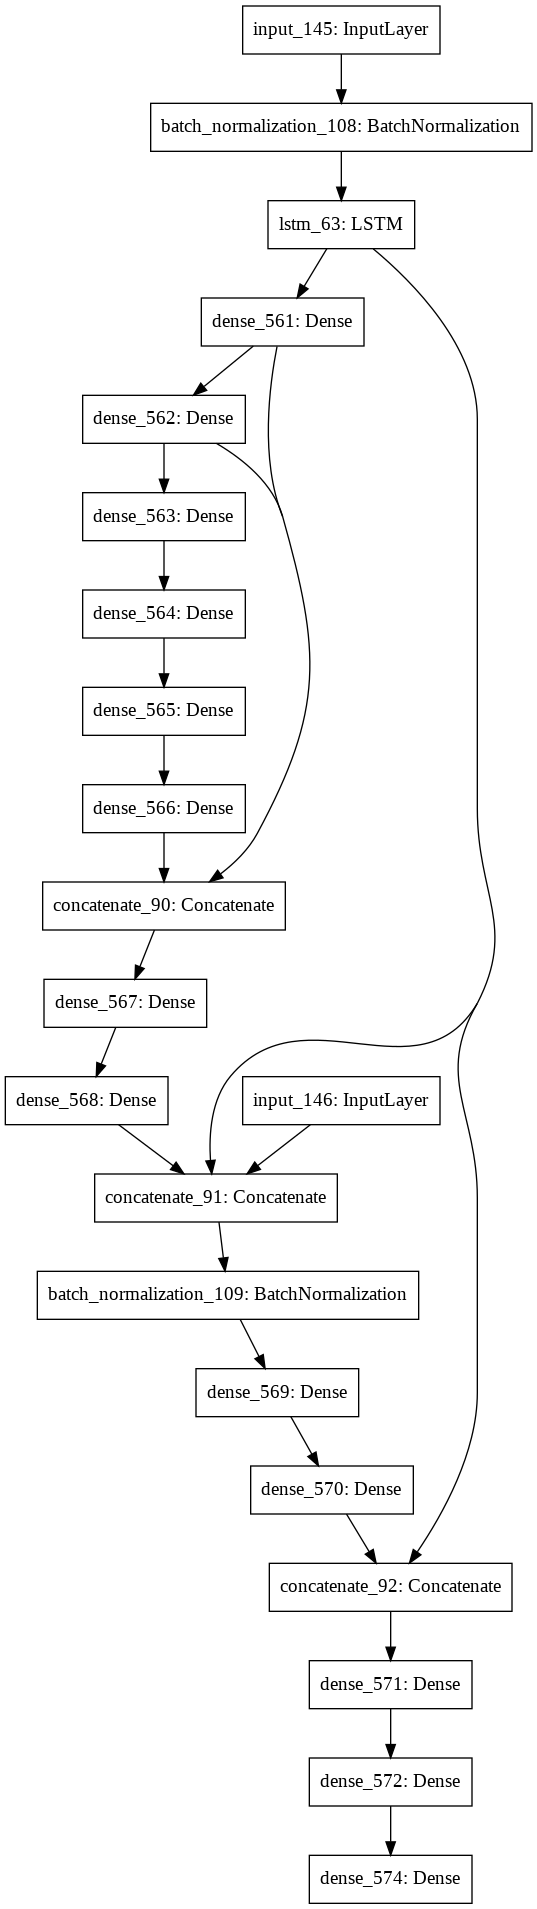

In [323]:
keras.utils.plot_model(model, "model_file_13.png")

In [293]:
#Let's perform value_count on reviews_ratings_selection by 'overall'. This will help us compute appropriate class weights for each class.
reviews_ratings_selection['overall'].value_counts(normalize=True)

4    0.612973
3    0.264959
2    0.122068
Name: overall, dtype: float64

In [325]:
class_weight = {2: 1,
                1: 2,
                0: 3
                }

#4: 2.5, 3: 4, 2: 3, 0: 3, 1: 1

In [326]:
#fit
history=model.fit((X_train,df_polarity_train),y_train_categorical,batch_size=32,validation_data=((X_test,df_polarity_test),y_test_categorical), epochs=20,verbose=1)

Epoch 1/20
119/119 [==============================] - 58s 487ms/step - loss: 0.8247 - accuracy: 0.6192 - val_loss: 0.8531 - val_accuracy: 0.6101
Epoch 2/20
119/119 [==============================] - 56s 472ms/step - loss: 0.8228 - accuracy: 0.6179 - val_loss: 0.8470 - val_accuracy: 0.6340
Epoch 3/20
119/119 [==============================] - 57s 480ms/step - loss: 0.8204 - accuracy: 0.6197 - val_loss: 0.8792 - val_accuracy: 0.6074
Epoch 4/20
119/119 [==============================] - 61s 511ms/step - loss: 0.8187 - accuracy: 0.6239 - val_loss: 0.8545 - val_accuracy: 0.6154
Epoch 5/20
119/119 [==============================] - 62s 518ms/step - loss: 0.8211 - accuracy: 0.6234 - val_loss: 0.8701 - val_accuracy: 0.6074
Epoch 6/20
119/119 [==============================] - 53s 442ms/step - loss: 0.8162 - accuracy: 0.6221 - val_loss: 0.8872 - val_accuracy: 0.6154
Epoch 7/20
119/119 [==============================] - 52s 438ms/step - loss: 0.8189 - accuracy: 0.6316 - val_loss: 0.8631 - val_ac

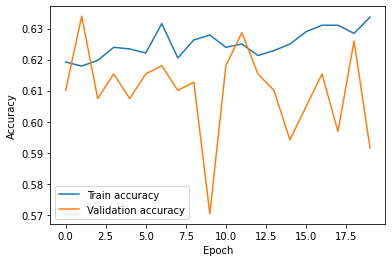

In [327]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Train accuracy')   #mae on training set
plt.plot(history.history['val_accuracy'],label='Validation accuracy');  #mae on validation set
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

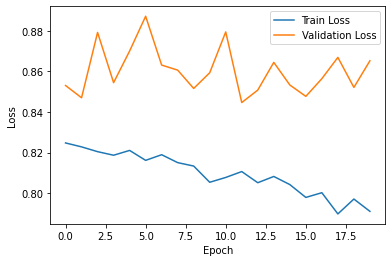

In [328]:
plt.plot(history.history['loss'],label='Train Loss')   #mae on training set
plt.plot(history.history['val_loss'],label='Validation Loss');  #mae on validation set
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [219]:
X_train.shape

(3800, 768)

In [176]:
model

In [329]:
preds=model.predict((X_test,df_polarity_test))

In [330]:
preds

array([[0.0041483 , 0.08224475, 0.9136069 ],
       [0.13470492, 0.32436088, 0.54093415],
       [0.21086779, 0.3340174 , 0.45511487],
       ...,
       [0.0052838 , 0.07255553, 0.9221607 ],
       [0.07294886, 0.2630947 , 0.66395646],
       [0.0200999 , 0.06631443, 0.9135857 ]], dtype=float32)

In [331]:
preds_class=np.argmax(preds,axis=1)
preds_class+2

array([4, 4, 4, 4, 4, 2, 4, 3, 3, 4, 2, 4, 4, 4, 4, 2, 2, 3, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 2, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 3, 4, 4, 4, 2, 3, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 3, 4, 2, 4, 3, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4,
       4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 2, 4, 4, 4,

In [332]:
print(classification_report(y_test,preds_class))

              precision    recall  f1-score   support

           0       0.28      0.16      0.21        55
           1       0.33      0.15      0.20        95
           2       0.66      0.88      0.75       227

    accuracy                           0.59       377
   macro avg       0.42      0.40      0.39       377
weighted avg       0.52      0.59      0.54       377



In [ ]:
pd.DataFrame(preds_class).value_counts()

5    255
4    183
3     37
1     25
dtype: int64

In [ ]:
y_test.value_counts(normalize=True)

5    0.706
4    0.166
3    0.058
1    0.042
2    0.028
Name: overall, dtype: float64